# <center>ASTR4004/8004 - Simulations - Part 3</center>

This notebook builds a simple 2D Monte Carlo Radiative Transfer simulation, based on the following pseudocode:

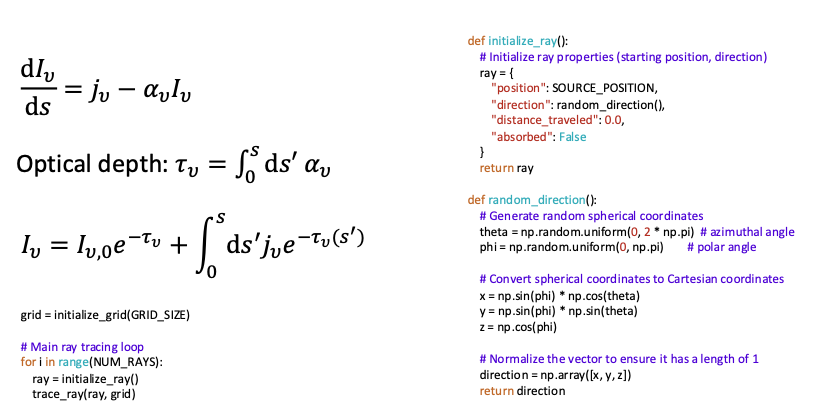

## Useful packages

In [ ]:
import matplotlib
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Here, Let's make a couple of setups and assumptions:
* We will fix our source in the center with a radius of `SOUR_RADIUS`.
* We will also fix the gas / sink to have a maximum radius of `SINK_RADIUS` and define a density profile (`den`) such as uniform or normalized Gaussian with the centre truncated due to the source. 
* Let's fix our donut domain in 2D polar coordination (`r`, `theta`) and split it into `N_RADIAL` (on the radial direction) x `N_ANGULAR` (on the angular direction) cells.
* In each step of the simulation, we will generate a photon packet in a Monte-Carlo fashion (fancy way of saying we will shoot the packet in a random direction). polar coordination makes the photon propogation algorithmically easy, as we only need to increment `r` cell by cell and fix `theta`.
* We will define `N_PHOTONS` as the number of photon packets needed to ionize the entire domain when recommbination is ignored. Therefore, each photon packet has an intial total energy of `ION_EFF` = $2\pi$(`SINK_RADIUS` - `SOUR_RADIUS`) * mean(`den`) / `N_PHOTONS`. We also assume ionizing photons can travel freely inside ionized gas ($\tau=0$) and completely absorbed in neutral gas ($\tau=\infty$).
* We will also consider recombination (`REC_RATE`), which scales propotionallt to the ionized fraction ($x_{\rm HII}$) squared and density, and hence increases the neutral fraction ($x_{\rm HI}$) by `REC_RATE`*`den`*area*$x_{\rm HII}^2$.

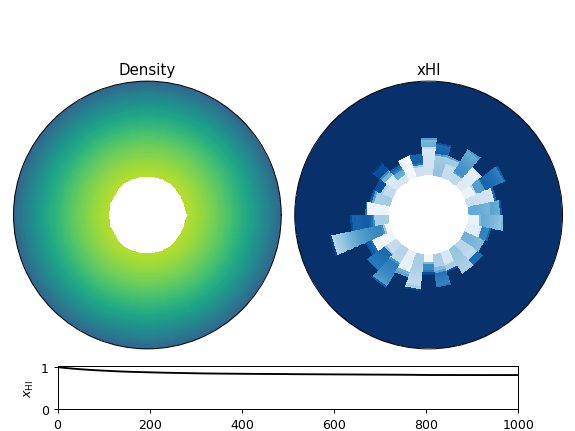

In [ ]:
# Simulation Parameters
SOUR_RADIUS = 0.1   # radius of the source
SINK_RADIUS = 10.0  # Maximum radius of the grid (in arbitrary units)
N_RADIAL    = 500   # Number of radial grid points
N_ANGULAR   = 36    # Number of angular grid points (degrees)
N_PHOTONS   = 1e1   # Number of packets needed to ionize the entire area
REC_RATE    = 1e-2  # Recombination rate coefficient

def rt():
    # Visualization
    global xHI, den

    # Using pcolormesh to create a polar plot
    r_edges     = np.linspace(SOUR_RADIUS, SINK_RADIUS, N_RADIAL+1)
    theta_edges = np.linspace(0, np.pi*2, N_ANGULAR+1)
    R_edges, Theta_edges = np.meshgrid(r_edges, theta_edges, indexing='ij')

    xHI = np.ones((N_RADIAL, N_ANGULAR))  # 1: Neutral, 0: Ionized
    den = np.ones((N_RADIAL, N_ANGULAR))  # uniform hydrogen density
    
    #sigma = 1
    #den = np.exp(-R_edges**2 / (2 * sigma**2))
    den /= np.mean(den) # normalize density so the mean is 1
    
    # Plot density and gas on the top in polar projection
    fig, axs = plt.subplots(1,2, subplot_kw={'projection': 'polar'})
    
    axs[0].pcolormesh(Theta_edges, R_edges, np.log10(den), cmap='viridis', vmin=-3, vmax=1)
    mesh = axs[1].pcolormesh(Theta_edges,R_edges, xHI, cmap='Blues', vmin=0, vmax=1)
    axs[0].set_title('Density')
    axs[1].set_title('xHI')
    for ax in axs:
        ax.grid(False)
        ax.set_rticks([])
        ax.set_xticks([])
        ax.fill_between([0,2*np.pi], 0, SOUR_RADIUS, color='white')

    # plot the neutral hydrogen fraction in the bottom to trace ionizing progress.
    axxH = plt.axes([0.1, 0.05, 0.8, 0.1])
    time_data = [0, ]
    xHIs_data = [1, ]
    evo_plot, = axxH.plot(time_data, xHIs_data, color='k')
    axxH.set_ylabel(r'$x_{\rm HI}$')
    axxH.set_xlabel(r'time')
    axxH.set_ylim(-0.02,1.02)
    axxH.set_xlim(0, Nframe)

    plt.tight_layout()
    
    def evolve(it):
        global xHI, den
        
        # Initialize photon at the edge of the source
        los_step  = ...
        theta_pos = ...
        ION_EFF   = ...
        
        while True:
            area = ...
                            
            if xHI[los_step, theta_pos] * den[los_step,theta_pos] * area > ION_EFF:
                # completely absorbed and the gas is partially ionized
                ...
                
            else:
                # partially absorbed and the gas is completely ionized
                ...

        # Now let's do recombination
        for los_step in range(N_RADIAL):               
            for theta_pos in range(N_ANGULAR):
                ...
                
        np.clip(xHI, 0, 1) # obviously, you don't want to over-recombine.
        mesh.set_array(xHI)
        
        time_data.append(it)
        xHIs_data.append(np.mean(xHI))
        evo_plot.set_data(time_data, xHIs_data)
    
    anim = FuncAnimation(
        fig,
        evolve,
        frames = Nframe,
        interval = interval,
        blit = True,
        repeat = False,
    )

    return anim

In [ ]:
plt.close()
Nframe = 1000
interval=0
rt()